# **Hand Gesture Controlled Game**

<h2><b>About the content</b></h2>This project describes a simple hand gesture-controlled game implemented using Python libraries for computer vision. The game utilizes a webcam to capture the player's hand gestures, interpreting them to control the movement within the game environment.

# **1. Setting up Dependencies**

# 1.1 Installing dependencies


In [3]:
# Dependenices to install with versions
!cat requirement.txt

pip install opencv-python==4.9.0.80
pip install mediapipe==0.10.9
pip install math
pip install pyautogui==0.9.54


In [ ]:
# install requirement.txt 
pip3 install -r requirement.txt

# 1.2 Importing Libraries

In [1]:
# Importing Libraries 
import cv2 
import mediapipe as mp 
import math
import pyautogui  # Add this import

# Used to convert protobuf message to a dictionary. 
from google.protobuf.json_format import MessageToDict 

# **2. Initializing the model**

<h4>Initializing the Model: Initialize the MediaPipe Hands model for hand tracking and gesture recognition with specific configurations such as model complexity, detection confidence thresholds, and maximum number of hands to detect.</h4>

In [2]:
# Initializing the Model 
mpHands = mp.solutions.hands 
hands = mpHands.Hands( 
    static_image_mode=False, 
    model_complexity=0,  # Lower model complexity
    min_detection_confidence=0.5,  # Lower detection confidence
    min_tracking_confidence=0.5,  # Lower tracking confidence
    max_num_hands=2) 


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


# **3. Start Capturing video** 
<h4>Start Capturing Video from Webcam: Open a video capture stream from the default webcam (index 0).</h4>

In [3]:
# Start capturing video from webcam 
cap = cv2.VideoCapture(0) 

# 3.1 Defining Utilites
<h4>Initialize the drawing utilities</h4>

In [4]:
# Initialize the drawing utilities
mp_draw = mp.solutions.drawing_utils

# **4. Run the model**

In [5]:
while True: 
    # Read video frame by frame 
    success, img = cap.read() 

    # Flip the image(frame) 
    img = cv2.flip(img, 1) 

    # Resize image to a smaller resolution for faster processing
    img = cv2.resize(img, (640, 480))

    # Convert BGR image to RGB image 
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

    # Process the RGB image 
    results = hands.process(imgRGB) 

    # Initialize hand closure states
    left_hand_closed = False
    right_hand_closed = False

    # If hands are present in image(frame) 
    if results.multi_hand_landmarks and len(results.multi_hand_landmarks) == 2: 
        for hand, handedness in zip(results.multi_hand_landmarks, results.multi_handedness):
            # Return whether it is Right or Left Hand 
            label_dict = MessageToDict(handedness) 
            label = label_dict['classification'][0]['label'] 

            # Get hand landmarks
            hand_landmarks = hand.landmark

            # Get the tip landmarks
            tip_landmarks = [hand_landmarks[4], hand_landmarks[8], hand_landmarks[12], hand_landmarks[16], hand_landmarks[20]]

            # Compute the distance between thumb tip and index finger tip
            thumb_tip = tip_landmarks[0]
            index_tip = tip_landmarks[1]
            distance = math.sqrt((thumb_tip.x - index_tip.x)**2 + (thumb_tip.y - index_tip.y)**2 + (thumb_tip.z - index_tip.z)**2)

            # Check if the distance is less than a threshold to consider the hand closed
            if distance < 0.05:  # Adjust threshold as needed
                if label == 'Left':
                    left_hand_closed = True
                elif label == 'Right':
                    right_hand_closed = True

            # Draw landmarks with connections
            mp_draw.draw_landmarks(img, hand, mpHands.HAND_CONNECTIONS)

        # Print message based on hand closure states
        message = ""
        if left_hand_closed and not right_hand_closed:
            message = "Brake"
            pyautogui.keyDown('down')
        elif right_hand_closed and not left_hand_closed:
            message = "Gas"
            pyautogui.keyDown('up')
        else:
            pyautogui.keyUp('up')  # Release up key if neither hand is closed
            pyautogui.keyUp('down')  # Release down key if neither hand is closed

        # Display message on the image if only one hand is closed
        if message:
            cv2.putText(img, message, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display Video and when 'q' 
    # is entered, destroy the window 
    cv2.imshow('Image', img) 
    if cv2.waitKey(1) & 0xff == ord('q'): 
        break

# Release the VideoCapture and destroy any OpenCV windows
cap.release()
cv2.destroyAllWindows()

<b>Processing Video Frames in a Loop:</b>
<ul>
<li>Read each frame from the webcam stream.</li>
<li>Flip the frame horizontally.</li>
<li>Resize the frame to a smaller resolution.</li>
<li>Convert the color space from BGR to RGB.</li>
</ul>

<b>Detect Hand Closure States:</b>
<ul>
<li>Iterate over detected hands and handedness.</li>
<li>Determine left or right hand.</li>
<li>Extract landmarks for specific fingertips.</li>
<li>Calculate thumb-to-index-finger distance.</li>
<li>Check if hand is closed based on distance threshold.</li>
</ul>

<b>Perform Actions Based on Hand Gesture:</b>
<ul>
<li>If only one hand is closed:</li>
<li>Simulate pressing "Gas" or "Brake" keys using PyAutoGUI.</li>
<li>Display corresponding message on the frame.</li>
</ul>

<b>Display the Processed Video Frame:</b>
<ul>
<li>Show the processed frame with annotations.</li>
<li>Check for 'q' key press to exit the loop.</li>
</ul>
<b>Release Resources and Close Windows:</b>
<ul>
<li>Release the webcam stream.</li>
<li>Close all OpenCV windows.</li>
</ul>

# Sample Images Output


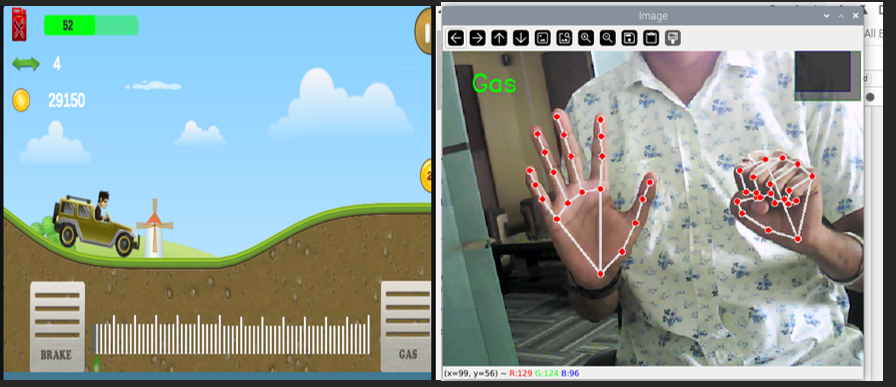
## Car is Moving
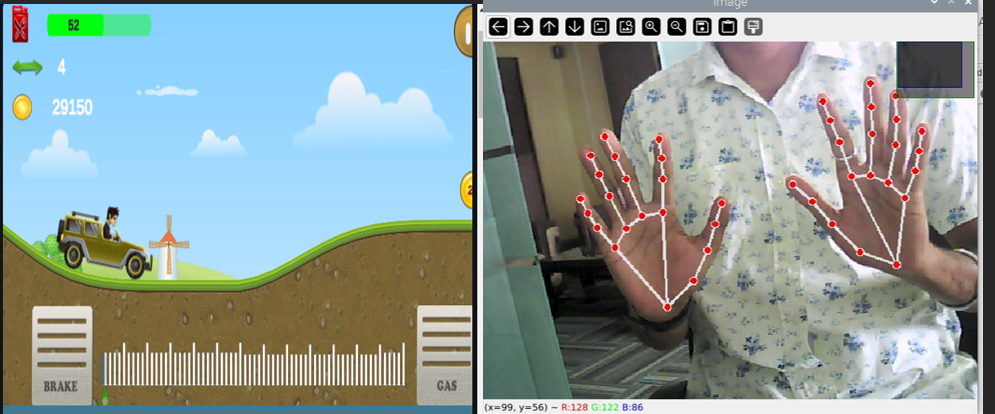
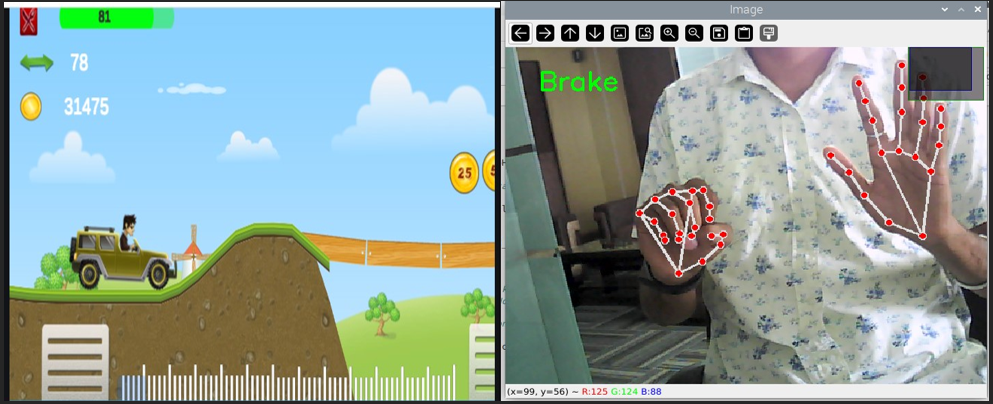
## Car is Stoped

# Sample Video Output

In [7]:
from ipywidgets import Video

Video.from_file("./Screen_recording.mp4", width=640, height=480)

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free...', height='480', wid…